In [26]:
import pandas as pd
import seaborn as sns
import scipy.stats
 
data = pd.read_csv('/content/gapminder.csv', low_memory=False)

In [27]:
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
 
sub1 = data.copy()

In [28]:
sub3 = sub1[['internetuserate', 'polityscore']].dropna()
sub3['polityscore_binned'] = pd.cut(sub3.polityscore, 3, labels=['Low', 'Mid', 'High'])
sub3['internetuserate_binned'] = pd.cut(sub3.internetuserate, 2, labels=['Low', 'High'])

sub4 = sub3.copy()

In [22]:
ct1 = pd.crosstab(sub4['internetuserate_binned'], sub4['polityscore_binned'])
ct1

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,23,27,62
High,5,1,37


In [23]:
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
colpct

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,0.821429,0.964286,0.626263
High,0.178571,0.035714,0.373737


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


AttributeError: ignored

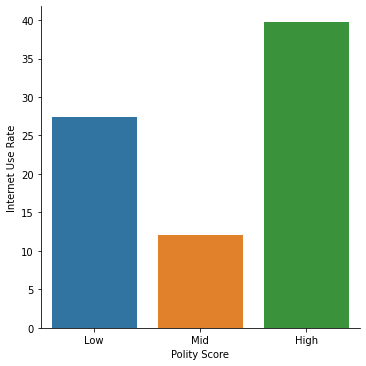

In [25]:
sns.factorplot(x="polityscore_binned", y="internetuserate", data=sub4, kind="bar", ci=None)
plt.xlabel('Polity Score')
plt.ylabel('Internet Use Rate')
sns.plt.show()

In [32]:
recode1 = {'Low': 'Low', 'Mid': 'Mid'}
sub4['COMP-Low-v-Mid']= sub4['polityscore_binned'].map(recode1)

In [33]:
ct2=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Low-v-Mid'])
ct2

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,23,27
High,5,1


In [31]:
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
colpct

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,0.821429,0.964286
High,0.178571,0.035714


In [34]:
cs2= scipy.stats.chi2_contingency(ct2)
cs2

(1.68, 0.19492445251365376, 1, array([[25., 25.],
        [ 3.,  3.]]))

In [37]:
recode2 = {'Low': 'Low', 'High': 'High'}
sub4['COMP-Low-v-High']= sub4['polityscore_binned'].map(recode2)

In [38]:
ct4=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Mid-v-High'])
ct4

KeyError: ignored

In [39]:
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
colpct

NameError: ignored

In [40]:
cs4= scipy.stats.chi2_contingency(ct4)
cs4

NameError: ignored